# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/15/22
* Student Name: Ali Roth
* Student Net ID: wat6sv
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: https://github.com/aliroth/MonteCarloSimulator

# The Monte Carlo Module

In [1]:
import pandas as pd
import numpy as np

class Die():
    '''
    A class to represent a 'die' and pull a random sample from the die. Die defaults to equal weights, or can be weighted to favor some values 
    more than others. 

        Attributes: 
        ----------
        face (np.array) : an array of strings or numbers that represent the faces of die
        weight (np.array(float)) : an array of weights for corresponding faces. Default 1.0, can be change with change_weight()

        Methods:
        --------
        change_weight(face_val, new_weight) 
            changes the weight of the indicated face

        roll(num_rolls = 1)
            returns a weighted random sample of rolls from the faces with replacement 

        show_die()
            returns the dataframe with the current face and weight values
    '''
    def __init__(self, faces):
        '''
        Constructs all the necessary attributes for the die object.

        Parameters
        ----------
            faces : np.array(str or int)
                array of string or integer values of die "faces"/"sides"         
        '''
        self.faces = np.array(faces)
        self._die_df_ = pd.DataFrame()
        self._die_df_["face"] = self.faces
        self._die_df_['weight'] = 1.0
        
    def change_weight(self, face_val, new_weight):
        '''
        Changes the weighting of the indicated face.

        Parameters
        ----------
            face_val : str or int
                face to have weight changed
            new_weight : float
                new weight for face_val
        Returns
        -------
            None
        '''
        ##parameter errors
        if face_val not in self._die_df_.face.values:
            return "Error: value is not on die. Please enter a face value on the die."
        else:
            next
        if type(new_weight) != 'float' and type(new_weight) != 'int':
            float(new_weight)
        
        ##replace entire row with face_val and new weight
        idx = self._die_df_.index[self._die_df_['face'] == face_val]
        self._die_df_.loc[idx, ['face', 'weight']] = [face_val, new_weight]
        
        
    def roll(self, num_rolls = 1):
        '''
        Creates a weighted random sample of size num_rolls from the faces of the die with replacement.

        Parameters
        ----------
            num_rolls : int
                number of times the die is to be rolled. default = 1
        Returns
        -------
            Dataframe containing results of random sample
        '''
        ##random sample
        return list(self._die_df_.sample(num_rolls, weights = self._die_df_[:]["weight"], replace = True))
    
    def show_die(self):
        '''
        Shows current faces and weights on die.

        Parameters
        ----------
            None

        Returns
        -------
        _die_df_ (pd.DataFrame) : Dataframe containing current face and weight values.
        '''
        return self._die_df_

class Game():
    '''
    A class to represent a game where 1 or more die are rolled. 

        Attributes: 
        ----------
            dice (list(Die objects)) : a list of already initiated Die objects

        Methods:
        --------
            play(rolls) 
                rolls the die in dice rolls number of times

            show_game(show = "wide")
                returns a dataframe of the most recent play in a wide (default) or narrow format
    '''

    def __init__(self, dice):
        '''
        Constructs all the necessary attributes for the Game object. Checks that all die have the same number of faces

        Parameters
        ----------
            dice : list(Die objects)
                a list of already initiated Die objects - all Die must have the same number of faces        
        '''        
        self.dice = dice
        
        #checks to make sure that all die have same number of faces
        faces = len(dice[0].show_die())
        self._play_df_ = pd.DataFrame()
        for d in dice:
            if len(d.show_die()) != faces:
                print("Error: dice must have the same number of faces.")

    def play(self, rolls):
        '''
        Rolls all of the die in the dice list. Saves results in a private dataframe.

        Parameters
        ----------
            rolls : int
                number of times each die is to be rolled

        Returns
        -------
            None
        '''
        self._play_df_ = pd.DataFrame()
        i = 1
        
        ##roll each die and add values to dataframe 
        for die in self.dice:
            temp = pd.DataFrame({"die" + str(i): die.roll(num_rolls = rolls)})
            temp = temp.reset_index(drop = True)
            self._play_df_ = pd.concat([self._play_df_, temp], axis = 1)
            i+= 1
        
        ##change indexing to start @1 and name roll
        self._play_df_.index = np.arange(1, len(self._play_df_) + 1)
        self._play_df_.index.rename("roll", inplace = True)
    
    def show_game(self, show = "wide"):
        '''
        Shows results of the most recent play in a dataframe. Can be displayed as a wide table (default) or a narrow table.

        Parameters
        ----------
            show : str
                "wide" or "narrow", default = "wide"

        Returns
        -------
            _play_df_ (pd.DataFrame) : Dataframe containing results of most recent play.
        '''
        ##pass dataframe to user in narrow or wide format
        if show == "narrow":
            print_df = self._play_df_.copy()
            print_df = print_df.stack().to_frame("faces")
            return print_df
        elif show == "wide":
            return self._play_df_
        
        ##print error message if invalid parameter is passed
        else:
            return 'Error: enter a valid table type, "narrow" or "wide".'
        
class Analyzer():
    '''
    A class to analyze the a Game object where 1 or more Die objects are rolled to create a random sample.

    Attributes: 
    ----------
        game (Game) : a Game object that has been played

    Methods:
    --------
        jackpot() 
            returns the number of times all die roll the same value

        combo()
            returns a dataframe with all the combinations of face values rolled and the counts for each

        face_counts_per_roll()
            returns a dataframe with a count for each face on each roll
    '''    
    def __init__(self, game):
        '''
        Constructs all the necessary attributes for the Analyzer object.

        Parameters
        ----------
            game : Game object
                a Game object that has been played to be analyzed        
        '''
        self.game = game
        die_type = type(self.game.dice[:])
        self.face_df = pd.DataFrame()
        
    def jackpot(self):
        '''
        Determines the number of "jackpots" in a roll - where all die roll the same face value. Returns the number of jackpots in the game.

        Parameters
        ----------
            None

        Returns
        -------
            int : number of jackpots rolled in game
        '''
        jackpot_df = self.game.show_game()
        jackpot_results = pd.DataFrame()
        
        ##grab each row of dataframe
        for i in jackpot_df.index.values:
            x = jackpot_df.loc[i].to_list()
            val = x[0]
            
            ##check if values in row e the same
            for X in x:
                if val == X:
                    result = True
                else:
                    result = False
                    break
            
            ##add "jackpot" rows with all the same value to new dataframe
            if result == True:
                x_df = pd.DataFrame(x).T
                jackpot_results = pd.concat([jackpot_results, x_df], axis = 0)
        
        ##change indexing to start @1 and name roll
        jackpot_results.index = np.arange(1, len(jackpot_results) + 1)
        jackpot_results.index.rename("roll", inplace = True)
        
        ##return number of jackpots to the user
        return len(jackpot_results) 
        
    def combo(self):
        '''
        Returns a dataframe with all combinations of face values rolled and cooresponding counts for each combination.

        Parameters
        ----------
            None

        Returns
        -------
            face_df (pd.DataFrame) : combinations of face values and counts
        '''
        ##shows count of combinations rolled
        self.face_df = self.game._play_df_.apply(lambda x: pd.Series(sorted(x)), 1)\
         .value_counts()\
         .to_frame('count')
        
        return self.face_df
    def face_counts_per_roll(self):
        '''
        Returns a dataframe with number or times each face value was rolled in each roll.

        Parameters
        ----------
            None

        Returns
        -------
            f_count (pd.DataFrame) : count of each face value for each roll
        '''
        #counts how many times each face was rolled per roll
        self.f_count = self.game.show_game().apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        
        return self.f_count

# Test Module

In [4]:
# A code block with your test code.
from MonteCarlo import MonteCarlo as MC
import pandas as pd
import unittest

class MonteCarloSimulatorTestSuite(unittest.TestCase):
    '''
    Simple unit tests for the MonteCarloSimulator package. One unit test per method for all classes.

    Tests
    -----
        test_change_weight()
            creates a Die objects and changes the weight of the first face value. Checks that the new weight is in the dataframe.

        test_roll()
            creates a Die object and rolls using the default number of rolls (1). Checks that the method returns a dataframe of length 1.

        test_show_die()
            creates a Die object with 3 face values. Checks that the method returns a dataframe of shape 3 rows (face values) x 2 columns (face values and weights).

        test_play()
            creates a Game object with 3 Die objects and plays the Game with 3 rolls. Checks that the method returns a dataframe of shape 3 rows (rolls) x 3 columns (number of dice).

        test_show_game()
            creates a Game object with 3 Die objects and plays the Game with 3 rolls. Checks that the method returns a dataframe of shape 3 rows (rolls) x 3 columns (number of dice) when "wide" parameter is passed 
            and a dataframe of shape 9 rows (rolls of all 3 Die) x 1 column (face value rolled) when the "narrow" parameter is passed.

        test_jackpot()
            creates an Analyzer object with a Game where each roll results in a jackpot. creates an Analyzer object with a Game where no roll results in jackpot. Checks that the first method returns the number of 
            rolls and the second method returns 0.

        test_combo()
            creates an Analyzer object with a Game where each roll results in the same combination of face values. Checks that the data frame returned has 1 row.

        test_face_counts_per_roll()
            creates an Analyzer object with a Game where each roll results in the same combination of face values. Checks that the data frame returned has 1 column.
    '''
    
    def test_change_weight(self):
        '''
        Creates a Die objects and changes the weight of the first face value. 
        Returns True if the new weight is in the dataframe at the position of the face value invoked.
        '''
        vals = [1, 2, 3]
        die = MC.Die(vals)
        
        die.change_weight(1, 2)
        msg = "weight was not changed"
        self.assertTrue(die.show_die().iloc[0][1] == 2, msg)
        
    def test_roll(self):
        '''
        Creates a Die object and rolls using the default number of rolls (1). 
        Returns True if the method returns a dataframe of length 1.
        '''
        vals = [1, 2, 3]
        die = MC.Die(vals)
        
        msg = "die was not correctly rolled"
        self.assertTrue(len(die.roll()) == 1, msg)
        
    def test_show_die(self):
        '''
        Creates a Die object with 3 face values. 
        Returns True if the method returns a dataframe of shape 3 rows (face values) x 2 columns (face values and weights).
        '''
        vals = [1, 2, 3]
        die = MC.Die(vals)
        
        msg = "data frame was not correctly generated"
        self.assertTrue(die.show_die().shape == (3,2), msg)
        
    def test_play(self):
        '''
        Creates a Game object with 3 Die objects and plays the Game with 3 rolls. 
        Retruns True if the method returns a dataframe of shape 3 rows (rolls) x 3 columns (number of dice).
        '''
        vals = [1, 2, 3]
        die = MC.Die(vals)
        dice = [die, die, die]
        
        game = MC.Game(dice)
        game.play(3)
        msg = "data frame was not correctly generated"
        self.assertTrue(game.show_game().shape == (3,3), msg)
        
    def test_show_game(self):
        '''
        creates a Game object with 3 Die objects and plays the Game with 3 rolls. 
        Returns True if the method returns a dataframe of shape 3 rows (rolls) x 3 columns (number of dice) when "wide" parameter is passed and a dataframe of shape 9 rows (rolls of all 3 Die) x 1 column (face 
        value rolled) when the "narrow" parameter is passed.
        '''
        vals = [1, 2, 3]
        die = MC.Die(vals)
        dice = [die, die, die]
        
        game = MC.Game(dice)
        game.play(3)
        msg = "data frame was not correctly generated"
        self.assertTrue(game.show_game('wide').shape == (3,3) and game.show_game("narrow").shape == (9,1), msg)
        
    def test_jackpot(self):
        '''
        Creates an Analyzer object with a Game where each roll results in a jackpot. Creates an Analyzer object with a Game where no roll results in jackpot. 
        Returns True if the first method returns the number of rolls and the second method returns 0.
        '''
        vals1 = [1, 1]
        die1 = MC.Die(vals1)
        dice1 = [die1, die1]
        game1 = MC.Game(dice1)
        game1.play(3)
        
        vals2 = [2, 2]
        die2 = MC.Die(vals2)
        dice2 = [die1, die2]
        game2 = MC.Game(dice2)
        game2.play(3)
        
        anz1 = MC.Analyzer(game1)
        anz2 = MC.Analyzer(game2)
        
        jp1 = anz1.jackpot()
        jp2 = anz2.jackpot()
        
        
        msg = "jackpot does not calculate correctly"
        self.assertTrue(jp1 == 3 and jp2 == 0, msg)
    
    def test_combo(self):
        '''
        Creates an Analyzer object with a Game where each roll results in the same combination of face values. 
        Returns True if the data frame returned has a length of 1.
        '''
        vals = [1, 1, 1]
        die = MC.Die(vals)
        dice = [die, die, die]
        
        game = MC.Game(dice)
        game.play(3)
        
        anz = MC.Analyzer(game)
        msg = "combo does not calculate correctly"
        self.assertTrue(len(anz.combo()) == 1, msg)

    def test_face_counts_per_roll(self):
        '''
        Creates an Analyzer object with a Game where each roll results in the same combination of face values. 
        Returns True if the data frame returned has 1 column.
        '''
        vals = [1, 1, 1]
        die = MC.Die(vals)
        dice = [die, die, die]

        game = MC.Game(dice)
        game.play(3)

        anz = MC.Analyzer(game)
        msg = "face_counts_per_roll does not calculate correctly"
        self.assertTrue(len(anz.face_counts_per_roll().columns.values) == 1, msg)
        
if __name__ == '__main__':

    unittest.main(verbosity=3)

C:\Users\alexa\AppData\Roaming\jupyter\runtime\kernel-89b46db0-28e6-4f6e-97de-58a1904c36e7 (unittest.loader._FailedTest) ... ERROR

ERROR: C:\Users\alexa\AppData\Roaming\jupyter\runtime\kernel-89b46db0-28e6-4f6e-97de-58a1904c36e7 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\alexa\AppData\Roaming\jupyter\runtime\kernel-89b46db0-28e6-4f6e-97de-58a1904c36e7'

----------------------------------------------------------------------
Ran 1 test in 0.009s

FAILED (errors=1)


SystemExit: True

C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Test Results

In [ ]:
# A text block with the output of a successful test.
test_change_weight (__main__.MonteCarloSimulatorTestSuite) ... ok
test_combo (__main__.MonteCarloSimulatorTestSuite) ... ok
test_face_counts_per_roll (__main__.MonteCarloSimulatorTestSuite) ... ok
test_jackpot (__main__.MonteCarloSimulatorTestSuite) ... ok
test_play (__main__.MonteCarloSimulatorTestSuite) ... ok
test_roll (__main__.MonteCarloSimulatorTestSuite) ... ok
test_show_die (__main__.MonteCarloSimulatorTestSuite) ... ok
test_show_game (__main__.MonteCarloSimulatorTestSuite) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.043s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [2]:
# Code blocks with output
from MonteCarlo import MonteCarlo as MC
import pandas as pd

In [3]:
coin = ['H', 'T']
coinUF = MC.Die(coin)
coinF = MC.Die(coin)
coinUF.change_weight('H', 5)

#create Die lists to initiate games
fair_coins = [coinF, coinF, coinF]
unfair_coins = [coinF, coinUF, coinUF]

#create Games
game_fair = MC.Game(fair_coins)
game_unfair = MC.Game(unfair_coins)

#play games
game_fair.play(1000)
game_unfair.play(1000)

#create Analyzers
anz_fair = MC.Analyzer(game_fair)
anz_unfair = MC.Analyzer(game_unfair)

<AxesSubplot:title={'center':'Relative Frequency of Jackpots'}>

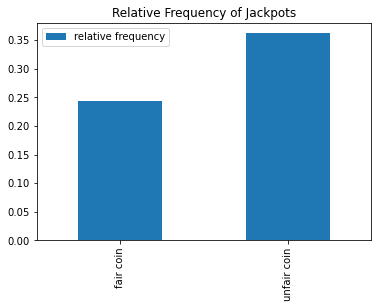

In [4]:
rel_freq = [anz_fair.jackpot()/1000, anz_unfair.jackpot()/1000]
jackpot_df = pd.DataFrame(rel_freq, columns = ['relative frequency'], index = ['fair coin', 'unfair coin'])

jackpot_df.plot.bar(title = "Relative Frequency of Jackpots")

## Scenario 2

In [5]:
# Code blocks with output
die = [1, 2, 3, 4, 5, 6]
dieUF1 = MC.Die(die)
dieUF2 = MC.Die(die)
dieF = MC.Die(die)

dieUF1.change_weight(6, 5)
dieUF2.change_weight(1, 5)

#create Die lists to initiate games
fair_dice = [dieF, dieF, dieF, dieF, dieF]
unfair_dice = [dieUF1, dieUF1, dieUF2, dieF, dieF]

#create Games
game_fair = MC.Game(fair_dice)
game_unfair = MC.Game(unfair_dice)

#play games
game_fair.play(10000)
game_unfair.play(10000)

#create Analyzers
anz_fair = MC.Analyzer(game_fair)
anz_unfair = MC.Analyzer(game_unfair)

<AxesSubplot:title={'center':'Relative Frequency of Jackpots'}>

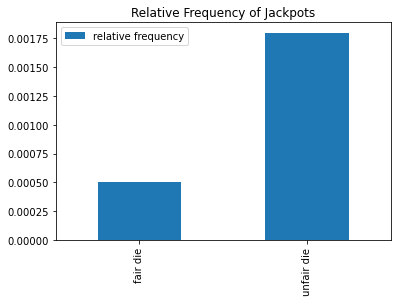

In [6]:
rel_freq = [anz_fair.jackpot()/10000, anz_unfair.jackpot()/10000]
jackpot_df = pd.DataFrame(rel_freq, columns = ['relative frequency'], index = ['fair die', 'unfair die'])

jackpot_df.plot.bar(title = "Relative Frequency of Jackpots")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


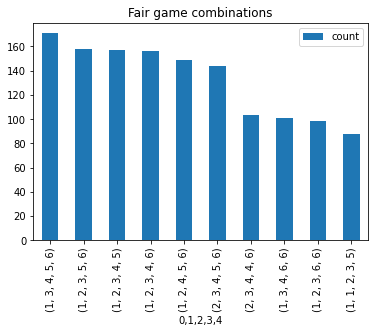

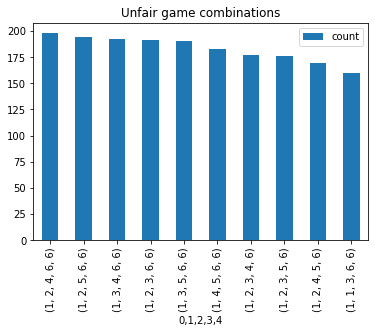

In [7]:
print(anz_fair.combo().head(10).plot.bar(title = "Fair game combinations"))
print(anz_unfair.combo().head(10).plot.bar(title = "Unfair game combinations"))

## Scenario 3

In [8]:
# Code blocks with output
alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
alpha_die = MC.Die(alpha)

alpha_die.change_weight('a', 8.4966)
alpha_die.change_weight('b', 2.0720)
alpha_die.change_weight('c', 4.5388)
alpha_die.change_weight('d', 3.3844)
alpha_die.change_weight('e', 11.1607)
alpha_die.change_weight('f', 1.8121)
alpha_die.change_weight('g', 2.4705)
alpha_die.change_weight('h', 3.0034)
alpha_die.change_weight('i', 7.5448)
alpha_die.change_weight('j', 0.1965)
alpha_die.change_weight('k', 1.1016)
alpha_die.change_weight('l', 5.4893)
alpha_die.change_weight('m', 3.0129)
alpha_die.change_weight('n', 6.6544)
alpha_die.change_weight('o', 7.1635)
alpha_die.change_weight('p', 3.1671)
alpha_die.change_weight('q', 0.1962)
alpha_die.change_weight('r', 7.5809)
alpha_die.change_weight('s', 5.7351)
alpha_die.change_weight('t', 6.9509)
alpha_die.change_weight('u', 3.6308)
alpha_die.change_weight('v', 1.0074)
alpha_die.change_weight('w', 1.2899)
alpha_die.change_weight('x', 0.2902)
alpha_die.change_weight('y', 1.7779)
alpha_die.change_weight('z', 0.2722)

alpha_list = [alpha_die, alpha_die, alpha_die, alpha_die, alpha_die]
game = MC.Game(alpha_list)
game.play(1000)

anz = MC.Analyzer(game)

In [9]:
results = anz.combo().index.values
results_strings = []

#change list of arrays into list of strings
for r in results:
    new = ""
    for i in r:
        new += i
    results_strings.append(new)

words = pd.read_csv("https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt")

#check if string is a word in list of scrabble words, put combos that are words into a dataframe
results_words = []
for j in results_strings:
    if j in words.values:
        results_words.append(j)
        
print(results_words)
print("Relative frequency of enlgish words " + str(len(results_words)/1000))

['adept', 'floss']
Relative frequency of enlgish words 0.002


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [16]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is C0DD-116E

 Directory of C:\Users\alexa\Documents\MSDS\DS5100\MonteCarloSimulator

07/14/2022  09:45 PM    <DIR>          .
07/14/2022  09:31 PM    <DIR>          ..
07/12/2022  11:19 PM             1,928 .gitignore
07/14/2022  09:13 PM    <DIR>          .ipynb_checkpoints
07/14/2022  09:16 PM            83,897 FinalProjectSubmissionTemplate.ipynb
07/12/2022  11:19 PM             1,085 LICENSE
07/14/2022  09:40 PM    <DIR>          MonteCarlo
07/14/2022  09:10 PM    <DIR>          MonteCarlo.egg-info
07/14/2022  09:15 PM            54,502 montecarlo_demo.ipynb
07/13/2022  09:19 PM               591 MonteCarloSimulator_testresults.txt
07/14/2022  09:15 PM             6,264 MonteCarloSimulatorTestSuite.py
07/14/2022  09:45 PM             8,793 README.md
07/14/2022  09:16 PM               348 setup.py
               8 File(s)        157,408 bytes
               5 Dir(s)  131,357,118,464 bytes free


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands

In [15]:
!pip install -e .

Obtaining file:///C:/Users/alexa/Documents/MSDS/DS5100/MonteCarloSimulator
  Attempting uninstall: MonteCarlo
    Found existing installation: montecarlo 0.1.17
    Uninstalling montecarlo-0.1.17:
      Successfully uninstalled montecarlo-0.1.17
  Running setup.py develop for MonteCarlo
